In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cost_revenue_dirty.csv")
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [3]:
df.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [4]:
print(df.isna().values.any())

False


In [6]:
print(df.duplicated().values.any())
duplicated_rows = df[df.duplicated()]
print(len(duplicated_rows))

False
0


In [9]:
# remove both $ and , characters
chars_to_remove = ["$" , ","]
columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in columns_to_clean:
    for char in chars_to_remove: 
        df[column] = df[column].astype(str).str.replace(char, "")
    df[column] = pd.to_numeric(df[column])
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [104]:
x = df[["USD_Worldwide_Gross", "USD_Domestic_Gross"]]
x

,USD_Worldwide_Gross,USD_Domestic_Gross
0,11000000,10000000
1,0,0
2,8000000,8000000
3,3000000,3000000
4,22000000,11000000
...,...,...
5386,0,0
5387,0,0
5388,0,0
5389,0,0


In [105]:
y = df["USD_Production_Budget"]
y

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [152]:
x_train = np.array(x_train).reshape(-1,2)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 2)
y_test = np.array(y_test).reshape(-1, 1)

In [142]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(7546, 1)
(3773, 1)
(3236, 1)
(3236, 1)


In [143]:
print(x_train.ndim)
print(y_train.ndim)
print(x_test.ndim)
print(x_test.ndim)

2
2
2
2


In [144]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [147]:
lr.fit(x_train, y_train)

LinearRegression()

In [148]:
lr.intercept_

array([15416945.66194945])

In [149]:
lr.coef_

array([[ 0.21567753, -0.06982912]])

In [150]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([[28984965.05907663],
       [35519414.78816804],
       [32252038.16691709],
       ...,
       [16872440.7069031 ],
       [15902039.36897076],
       [18992540.5822652 ]])

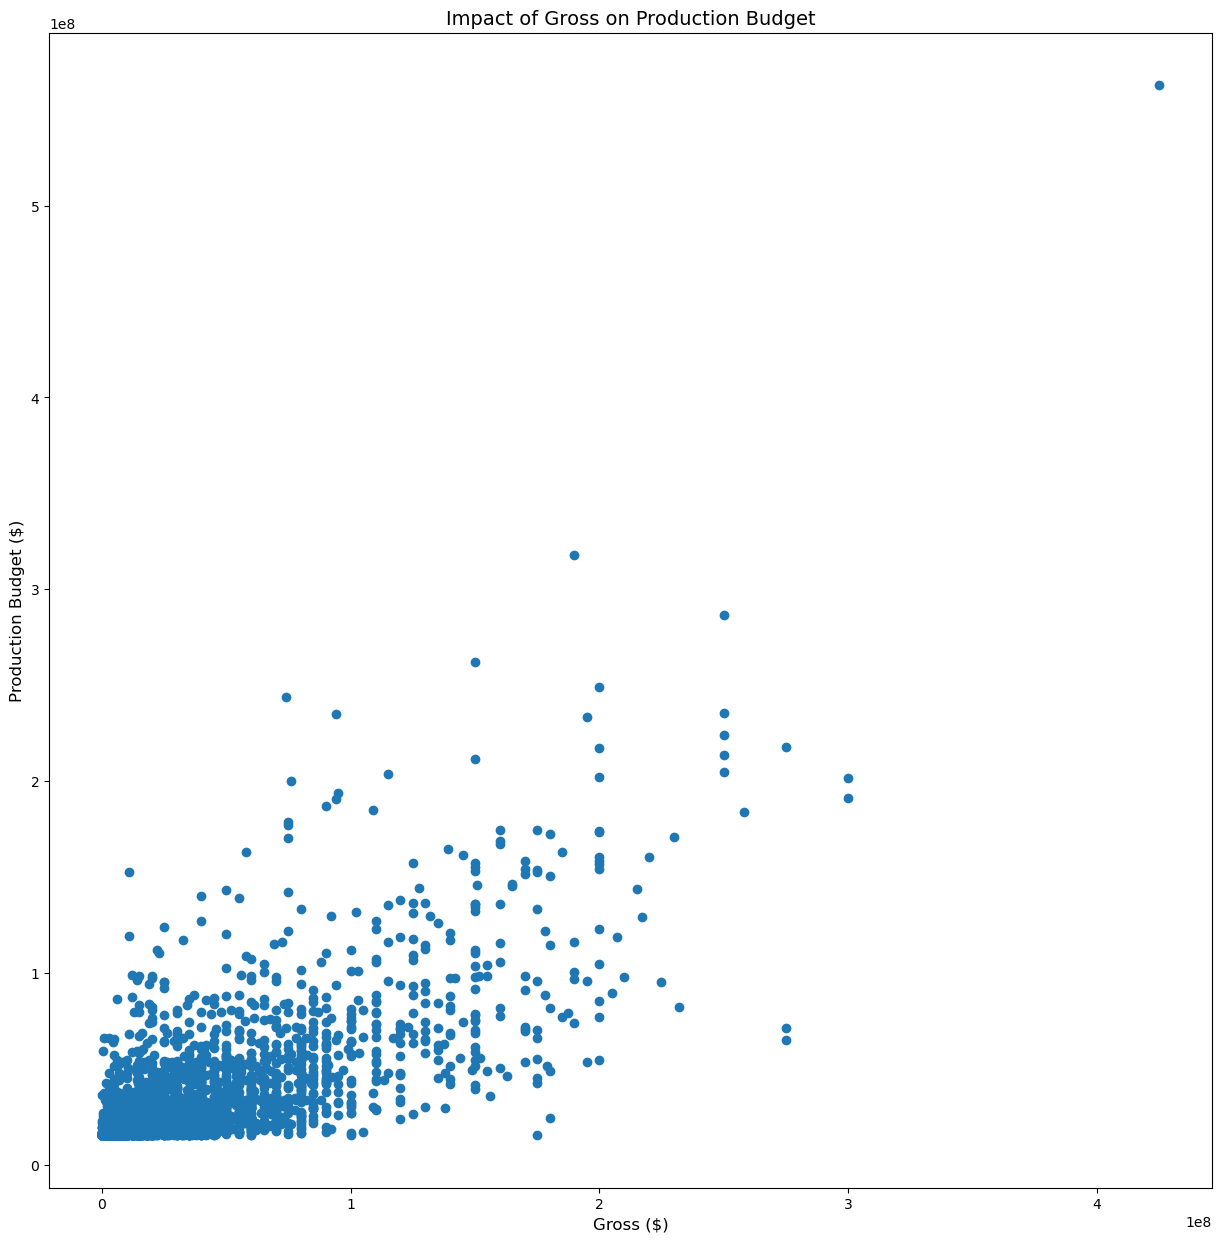

In [159]:
plt.figure(figsize=(15,15))
plt.scatter(y_train, y_pred_train)
plt.title("Impact of Gross on Production Budget", fontsize=14)
plt.xlabel("Gross ($)", fontsize=12)
plt.ylabel("Production Budget ($)", fontsize=12)
plt.show()

In [160]:
from sklearn.metrics import r2_score

In [164]:
print(f"R_Squared Score: {r2_score(y_train, y_pred_train)}")

R_Squared Score: 0.5486621339354032


In [153]:
lr.fit(x_test, y_test)

LinearRegression()

In [154]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([[19968203.84997972],
       [17227429.10346863],
       [26140645.92676577],
       ...,
       [16174027.54994615],
       [21821851.14008353],
       [43507659.30990396]])

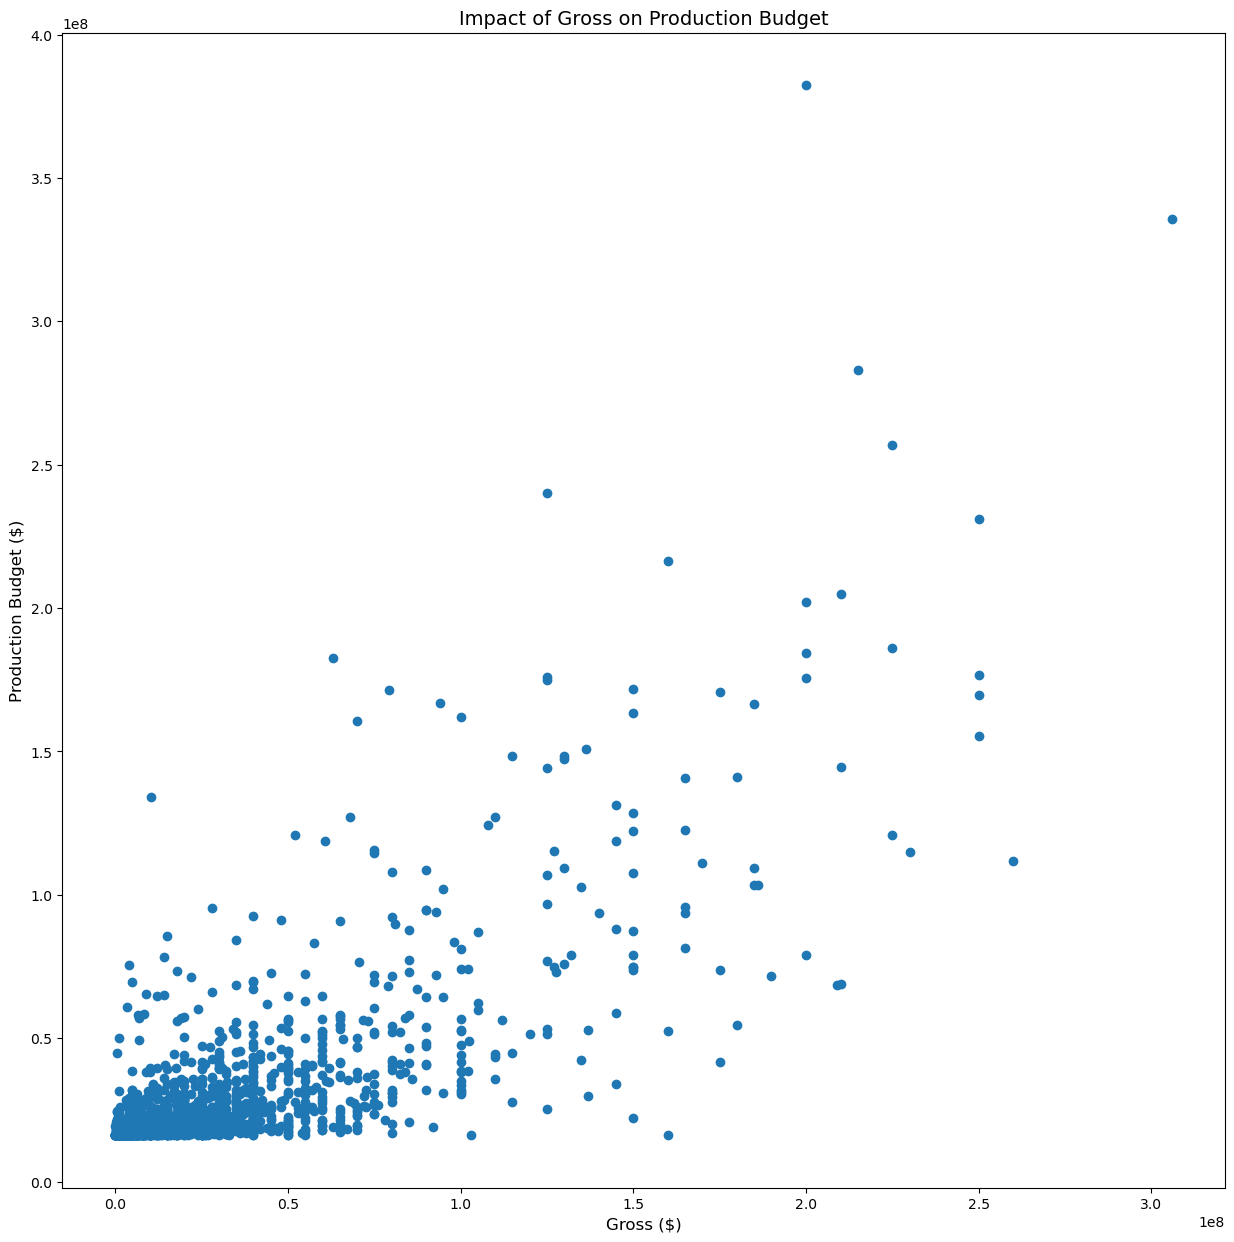

In [157]:
plt.figure(figsize=(15,15))
plt.scatter(y_test, y_pred_test)
plt.title("Impact of Gross on Production Budget", fontsize=14)
plt.xlabel("Gross ($)", fontsize=12)
plt.ylabel("Production Budget ($)", fontsize=12)
plt.show()

In [165]:
print(f"R_Squared Score: {r2_score(y_test, y_pred_test)}")

R_Squared Score: 0.5790942475534416


In [166]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Two - Way Analysis of Variance (ANOVA)

In [167]:
model = ols("USD_Production_Budget ~ USD_Worldwide_Gross + USD_Domestic_Gross", data=df).fit()
ANOVA = sm.stats.anova_lm(model, type=2)
ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
USD_Worldwide_Gross,1.0,4.889019e+18,4.889019e+18,6671.976808,0.000000
USD_Domestic_Gross,1.0,1.416033e+16,1.416033e+16,19.324407,0.000011
Residual,5388.0,3.948161e+18,7.327692e+14,NaN,NaN


## Interraction Effect 

In [168]:
model = ols("USD_Production_Budget ~ USD_Worldwide_Gross + USD_Domestic_Gross + USD_Worldwide_Gross * USD_Domestic_Gross", data=df).fit()
ANOVA = sm.stats.anova_lm(model, type=2)
ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
USD_Worldwide_Gross,1.0,4.889019e+18,4.889019e+18,6225.518236,0.000000e+00
USD_Domestic_Gross,1.0,1.416033e+16,1.416033e+16,18.031305,2.209595e-05
USD_Worldwide_Gross:USD_Domestic_Gross,1.0,2.634817e+17,2.634817e+17,335.509094,9.427055e-73
Residual,5388.0,4.231300e+18,7.853192e+14,NaN,NaN
